In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from PIL import Image
import os 
from sklearn.model_selection import train_test_split

In [3]:
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential

In [55]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
for i in range(classes):
    path = os.path.join('archive', 'Train', str(i))
    images = os.listdir(path)
    
    for a in images:
      try: 
        image = Image.open(path + '\\' + a)
        image = image.resize((30, 30))
        image = np.array(image)
        data.append(image)
        labels.append(i)
      except : 
        print("Error loading image")

data = np.array(data)
labels = np.array(labels)

In [56]:
labels.shape

(39209,)

In [57]:
data.shape

(39209, 30, 30, 3)

In [58]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state = 42)

In [59]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [60]:
import cv2
# converting the RGB to Gray scale 
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img
#eqaulize the intensity of the image
def equalize(img):
    img = cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

In [61]:
x_train = np.array(list(map(preprocessing, x_train)))

In [62]:
x_train.shape

(31367, 30, 30)

In [63]:
x_test = np.array(list(map(preprocessing, x_test)))

In [64]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

In [65]:
from keras.preprocessing.image import ImageDataGenerator

In [66]:
#applies data augemenation on the dataset 
dataGen = ImageDataGenerator(width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            zoom_range = 0.2,
                            shear_range = 0.1,
                            rotation_range = 10)

In [67]:
dataGen.fit(x_train)

In [68]:
batches = dataGen.flow(x_train, y_train, batch_size = 20)
x_batch, y_batch = next(batches)

In [69]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [70]:
imageDimension = (30,30,3)
def myModel():
    model = Sequential()
    model.add(tf.keras.layers.Conv2D(60, (5,5), input_shape =(imageDimension[0], imageDimension[1], 1), activation = 'relu'))
    model.add((tf.keras.layers.Conv2D(60, (5,5), activation = 'relu')))
    model.add(tf.keras.layers.MaxPooling2D(pool_size= (2,2)))
    
    model.add((tf.keras.layers.Conv2D(30, (3,3), activation = 'relu')))
    model.add((tf.keras.layers.Conv2D(30, (3,3), activation= 'relu')))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
    model.add(tf.keras.layers.Dropout(0.5))
              
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(500, activation= 'relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(43, activation = 'softmax'))
    model.compile(tf.keras.optimizers.Adam(learning_rate = 0.001), loss = tf.keras.losses.categorical_crossentropy, metrics = ['accuracy'])
    return model
        

In [71]:
mymodel = myModel()
print(mymodel.summary())
history = mymodel.fit_generator(dataGen.flow(x_train, y_train, batch_size = 32), steps_per_epoch = len(x_train)//32, epochs = 30, validation_data = (x_train, y_train), shuffle = 1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 60)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 30)          16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 30)          0         
 g2D)                                                   

C:\Users\Hardik Chaudhary\AppData\Local\Temp\ipykernel_3792\1881780374.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = mymodel.fit_generator(dataGen.flow(x_train, y_train, batch_size = 32), steps_per_epoch = len(x_train)//32, epochs = 30, validation_data = (x_train, y_train), shuffle = 1)




980/980 [==============================] - 68s 68ms/step - loss: 2.2264 - accuracy: 0.3625 - val_loss: 0.5487 - val_accuracy: 0.8263
Epoch 2/30
980/980 [==============================] - 70s 72ms/step - loss: 0.9511 - accuracy: 0.7038 - val_loss: 0.2229 - val_accuracy: 0.9375
Epoch 3/30
980/980 [==============================] - 73s 75ms/step - loss: 0.6402 - accuracy: 0.7986 - val_loss: 0.1331 - val_accuracy: 0.9629
Epoch 4/30
980/980 [==============================] - 82s 84ms/step - loss: 0.4995 - accuracy: 0.8442 - val_loss: 0.0936 - val_accuracy: 0.9733
Epoch 5/30
980/980 [==============================] - 86s 88ms/step - loss: 0.4275 - accuracy: 0.8663 - val_loss: 0.0695 - val_accuracy: 0.9788
Epoch 6/30
980/980 [==============================] - 88s 90ms/step - loss: 0.3773 - accuracy: 0.8842 - val_loss: 0.0769 - val_accuracy: 0.9750
Epoch 7/30
980/980 [==============================] - 89s 91ms/step - loss: 0.3413 - accuracy: 0.8938 - val_loss: 0.0662 - val_accuracy: 0.9793
E

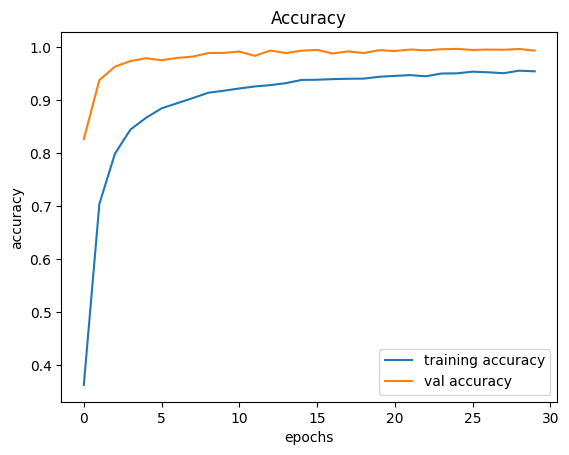

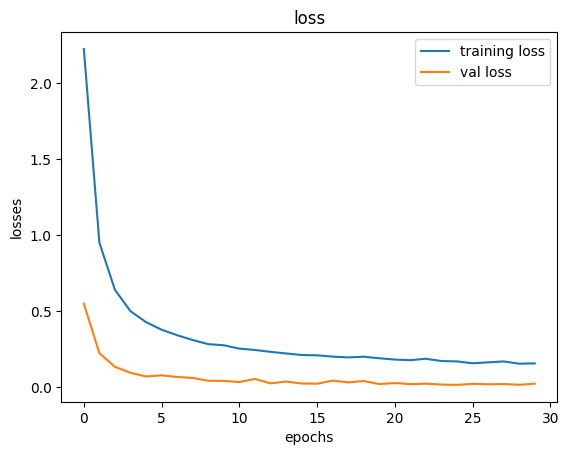

In [72]:
plt.figure(0)
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.title('loss')
plt.xlabel("epochs")
plt.ylabel('losses')
plt.legend()

In [76]:
from sklearn.metrics import accuracy_score 
import pandas as pd
y_test = pd.read_csv("archive\Test.csv")

In [77]:
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

In [82]:
test_data = []
path = os.path.join('archive', 'Test')
imgs = os.listdir(path)
for img in imgs:
    image = Image.open(path1 + '\\' + img)
    image = image.resize((30,30))
    test_data.append(np.array(image))
    
X_test = np.array(test_data)

In [83]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

In [84]:
X_test = np.array(list(map(grayscale, X_test)))
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [85]:
pred = mymodel.predict(X_test)
pred = np.argmax(pred, axis = 1)
from sklearn.metrics import accuracy_score
accuracy_score(labels, pred)

395/395 [==============================] - 14s 35ms/step


0.943784639746635

In [86]:
mymodel.save('traffic_classifer_final.h5')

c:\users\hardik chaudhary\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
